## Exericise 11

### 11.1

The aim of exercise 11.1 is to fit a linear function $f(x)=2x+1$ using a single neuron neural network.
At first, the dataset for training and testing are created:
1. *training set*: measures used to train the model and optimize regression parameters. Points in this set are obtained by adding a gaussian noise to the linear target function,
2. *validation set* (10% of the training set): to test the model accuracy on a separate set not involved in the training process. Like the training set, this is evaluated from linear target function + gaussian noise with same $\sigma$ as in the training set,
3. *target set*: the actual target function without the gaussian noise. The model accuracy is evaluated on this set as well.

The following graph reports the three dataset as an example, using 100 points for the training set, 10 points for the validation and target set (the latter is represented as a straight line, the other two as scatterplots).

In [1]:
### importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
#from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [5]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

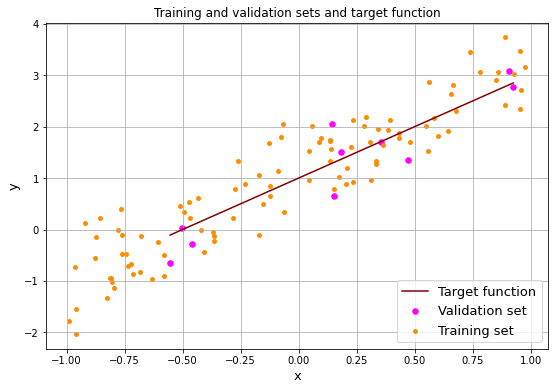

In [6]:
# plot training and target dataset
plt.figure(figsize=(9,6))
plt.plot(x_valid, y_target, color = "maroon", label = "Target function")
plt.scatter(x_valid, y_valid, color='magenta', s=30, label="Validation set")
plt.scatter(x_train, y_train, color = "darkorange", s=15, label="Training set")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Training and validation sets and target function")
plt.legend(loc="lower right", fontsize=13)
plt.grid(True); plt.show()

This first part of Lecture 11 focuses on three parameters: $N_{train}$ (the training set size), $\sigma$ (the gaussian noise standard deviation applied on the training and validation sets), $N_{epochs}$ (an epoch is a single run of the NN during the training phase). The mean sqaured error was used as loss function in the whole exercise.

At first these parameters were set to: $N_{train} = 100$, $\sigma=0$, $N_{epochs}=30$. With this parameters setting, the loss function evaluated on the validation set resulted to be $\approx 0.3$. After that, the training set size $N_{train}$, $\sigma$ and the number of epochs $N_{epochs}$ were varied to see how the model is related to these parameters and to improve the fitting. The script was simply run several times varying manually $N_{train}$, $\sigma$ and $N_{epochs}$ to find the best combination of the three parameters. Loss function on the validation and on the target set were taken into account to evaluate the fitting (loss function on the validation data was considered as well in order to avoid overfitting).

**Varying $\sigma$**: $ \ \ \ $ ($N_{epochs}=40$, $N_{train}=100$)

|sigma|predicted m|predicted b|loss on validation set|loss on target set|
|---|---|---|---|---|
|0.1|1.9332693|1.005875|0.010002939961850643|0.0011858774814754725|
|0.3|2.0103765|1.0422844|0.07495731115341187|0.001961078029125929|
|0.5|2.0715578|1.0032238|0.15864932537078857|0.001555219292640686|
|0.7|1.975122|0.86201894|0.4242778718471527|0.020328989252448082|
|0.9|2.0787158|0.9541927|0.8266009092330933|0.0027085761539638042|
|1.3|1.9195483|0.6753314|0.862949013710022|0.11573337018489838|

As expected, the loss function increases with $\sigma$ (the more the training data are spread, the more difficult it is to evaluate m and b). However, incresing the number of epochs it is possible to reduce the loss function on the target set (loss on validation set doesn't improve, this may be due to the fact that the validation set is spread as well).

$ \\ $

**Varying $N_{train}$**: $ \ \ \ $   ($N_{epochs}=40$, $\sigma=0.3$, $batch = 32$, validation set size always 10% of the training set size)

|training set size|predicted m|predicted b|loss on validation set| loss on target set|
|---|---|---|---|---|
|70|2.0668828|1.028657|0.11259597539901733|0.0034668243024498224|
|120|2.103306|1.0182844|0.09926555305719376|0.0027775231283158064|
|200|2.0409226|0.9646509|0.10246913135051727|0.0020201418083161116|
|500|2.0328834|0.97006744|0.09979042828083039|0.0013439443736569957|
|1000|2.0022569|1.0069656|0.07386541679501533|4.926809080643579e-05|

In general, predctions seem to improve increaing $N_{train}$, even if the loss function on the validation/target seem to depend more on $\sigma$ rather than $N_{train}$.

$ \\ $

**Varying $N_{epochs}$**: $ \ \ \ $   ($N_{train}= 500 $, $\sigma=0.3$, $batch = 32$, validation set size always 10% of the training set size)

|# epochs|predicted m|predicted b|loss on validation set| loss on target set|
|---|---|---|---|---|
|50|2.031459|0.96656036|0.10073151409626008|0.0015440493111964315|
|60|2.0192769|0.97956055|0.0599472776055336|0.000577559914381709|
|75|2.0210502|1.0103799|0.0705984503030777|0.0002262158808298409|
|100|1.9751853|0.9959381|0.08684590220451355|0.00020237264805473388|
|200|1.9968362|0.9857125|0.09561826169490814|0.00020259216660633683|

While the loss function on the target set decreases with $N_{epochs}$, the loss on the validation turns out to be higher for $N_{epochs} > \approx 60$. This could be due to overfitting.

In conclusion, in the rest of the exercise 11.1 the parameters were set to: $\sigma = 0.3$, $N_{train} = 800$, $N_{epochs}=45$.

In [39]:
#compose the NN model
model = tf.keras.Sequential()
## one layer with one input
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [40]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
np.random.seed(0)
# generate training inputs
x_train = np.random.uniform(-1, 1, 800)
x_valid = np.random.uniform(-1, 1, 80)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
    
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=45,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 800 samples, validate on 80 samples
Epoch 1/45
800/800 [==============================] - 1s 1ms/sample - loss: 0.9790 - mse: 0.9790 - val_loss: 0.6883 - val_mse: 0.6883
Epoch 2/45
800/800 [==============================] - 0s 218us/sample - loss: 0.5032 - mse: 0.5032 - val_loss: 0.3830 - val_mse: 0.3830
Epoch 3/45
800/800 [==============================] - 0s 206us/sample - loss: 0.3030 - mse: 0.3030 - val_loss: 0.2461 - val_mse: 0.2461
Epoch 4/45
800/800 [==============================] - 0s 195us/sample - loss: 0.2108 - mse: 0.2108 - val_loss: 0.1801 - val_mse: 0.1801
Epoch 5/45
800/800 [==============================] - 0s 201us/sample - loss: 0.1636 - mse: 0.1636 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 6/45
800/800 [==============================] - 0s 202us/sample - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1229 - val_mse: 0.1229
Epoch 7/45
800/800 [==============================] - 0s 197us/sample - loss: 0.1200 - mse: 0.1200 - val_loss: 0.1093 - val_mse: 0.1093
Epoch

In [9]:
# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print('Test loss on validation set:', score[0])
print('Test accuracy (= metrics) on validation set:', score[1])

# evaluate model with the exact curve
score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# print performance
print('Test loss on target set:', score[0])
print('Test accuracy (=metrics) on target set:', score[1])

Test loss on validation set: 0.8551745414733887
Test accuracy (= metrics) on validation set: 0.8551745414733887
Test loss on target set: 0.8408718109130859
Test accuracy (=metrics) on target set: 0.8408718109130859


The two graphs below show the result obtained with these parameters: the loss function trend during the training and predictions on a new set of data compared to the exact function.

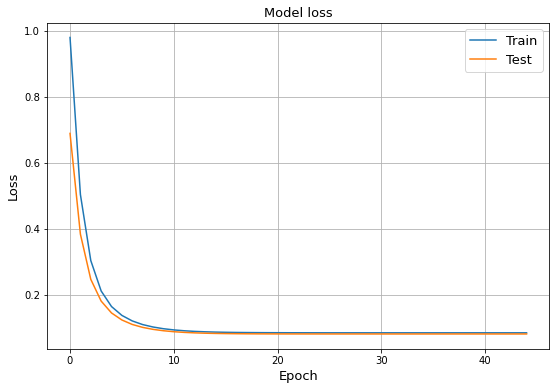

In [49]:
##-> 45 epochs, sigma 0.3,  ntrain = 800
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',size=13)
plt.ylabel('Loss',size=13)
plt.xlabel('Epoch',size=13)
plt.legend(['Train', 'Test'], loc='best',fontsize=13)
plt.grid(True)
plt.show()

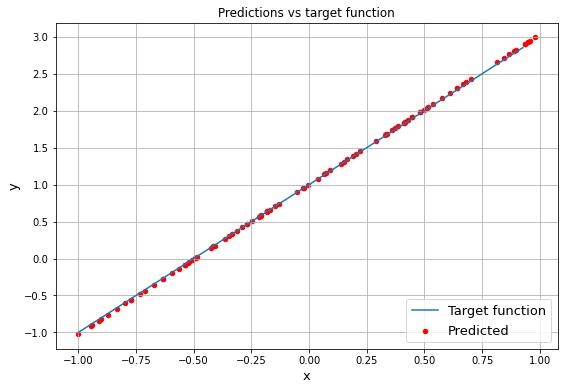

In [48]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(9,6))
plt.scatter(x_predicted, y_predicted, color = "r",s=20, label = "Predicted")
plt.plot(x_valid, y_target, label = "Target function")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function")
plt.legend(loc="lower right", fontsize=13)
plt.grid(True); plt.show()

### 11.2

In this section the function to fit is: $f(x)=4-3x-2x^2+3x^3$ for $x \in [-1,1]$, focusing on the following parameters:
- the number of layers $N_L$,
- the number of neurons in each layer $N_n$,
- the activation function,
- the optimizer,
- the loss function.

In [2]:
def func(x):
    return 4 - 3*x -2*(x**2) + 3*(x**3)

In [3]:
## training and validation sets (n train is still 800)
np.random.seed(0)
# generate training inputs
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = func(x_valid) # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(func(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(func(x_valid), sigma)

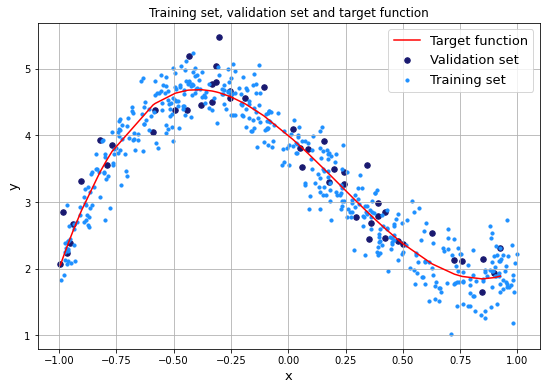

In [7]:
plt.figure(figsize=(9,6))
plt.plot(x_valid, y_target, color = "red", label = "Target function")
plt.scatter(x_valid, y_valid, color='midnightblue', s=30, label="Validation set")
plt.scatter(x_train, y_train, color = "dodgerblue", s=10, label="Training set")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Training set, validation set and target function")
plt.legend(loc="upper right", fontsize=13)
plt.grid(True); plt.show()

#### Number of layers & nodes per layer

In this phase the number of layers and nodes were varied looking for the best combination of the two. This was at first evalued using the accuracy (set to mse) on target and validation sets.

In [127]:
from itertools import product
models = [] 
Nl = [10,5,2] ## numero di layer
Nn = [3,10,25,50] ## numero di nodi
acc_val = []
acc_tar = []

for l,n in product(Nl, Nn): 
    model = tf.keras.Sequential()
    model.add(Dense(n, input_shape=(1,),activation="relu")) ## primo layer
    for i in range(l-1):  
        model.add(Dense(n, activation="relu"))
    model.add(Dense(1,activation="elu"))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=45,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
    models.append(model) ## nel vettore di modelli dopo il training
    print("model with " , l, " layers with ", n, " nodes each")
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    acc_val.append(score[1])
    print("mse on validation set = ", score[1])
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    acc_tar.append(score[1])
    print("mse on target set = ", score[1])

model with  10  layers with  3  nodes each
mse on validation set =  1.0099948644638062
mse on target set =  0.9929425120353699
model with  10  layers with  10  nodes each
mse on validation set =  0.19723279774188995
mse on target set =  0.10425441712141037
model with  10  layers with  25  nodes each
mse on validation set =  0.08919373154640198
mse on target set =  0.015796080231666565
model with  10  layers with  50  nodes each
mse on validation set =  0.105415478348732
mse on target set =  0.00738963857293129
model with  5  layers with  3  nodes each
mse on validation set =  1.000991940498352
mse on target set =  0.9842583537101746
model with  5  layers with  10  nodes each
mse on validation set =  0.11454568803310394
mse on target set =  0.025361742824316025
model with  5  layers with  25  nodes each
mse on validation set =  0.08480299264192581
mse on target set =  0.014292234554886818
model with  5  layers with  50  nodes each
mse on validation set =  0.18333645164966583
mse on targ

In [128]:
acc_val2 = np.round(acc_val, decimals=3)
acc_tar2 = np.round(acc_tar, decimals=3)

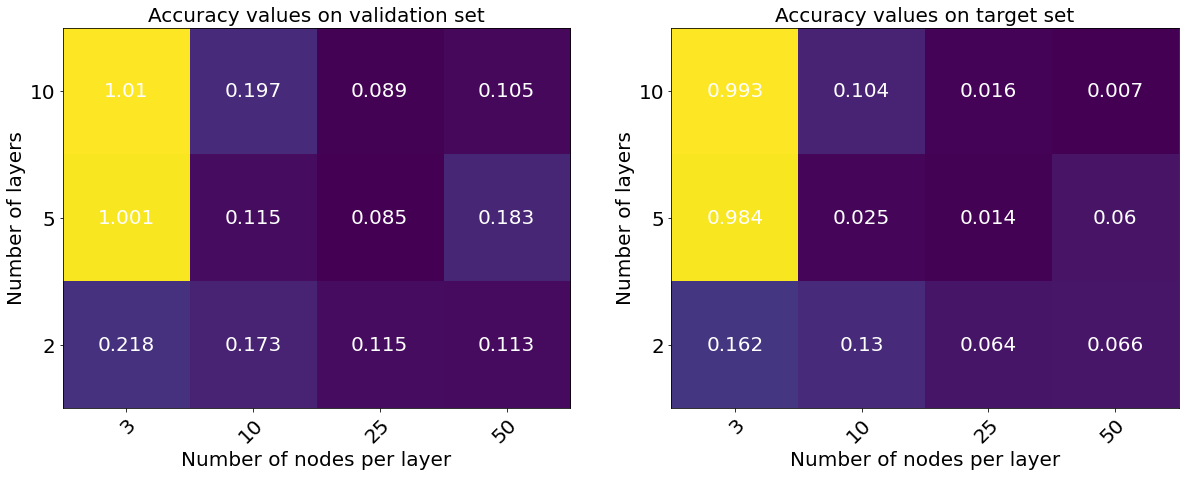

In [129]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
acc_val2 = np.reshape(acc_val2,(3,4))
acc_tar2 = np.reshape(acc_tar2,(3,4))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im1 = ax1.imshow(acc_val2)
ax1.set_xticks(np.arange(len(Nn)))
ax1.set_yticks(np.arange(len(Nl)))
ax1.set_xticklabels(Nn,size=20)
ax1.set_yticklabels(Nl,size=20)
ax1.set_xlabel("Number of nodes per layer",size=20)
ax1.set_ylabel("Number of layers",size=20)
ax1.set_title("Accuracy values on validation set", size=20)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(Nl)):
    for j in range(len(Nn)):
        text = ax1.text(j, i, acc_val2[i, j],
                       ha="center", va="center", color="w", size=20)

im2 = ax2.imshow(acc_tar2)
ax2.set_xticks(np.arange(len(Nn)))
ax2.set_yticks(np.arange(len(Nl)))
ax2.set_xticklabels(Nn,size=20)
ax2.set_yticklabels(Nl,size=20)
ax2.set_xlabel("Number of nodes per layer",size=20)
ax2.set_ylabel("Number of layers",size=20)
ax2.set_title("Accuracy values on target set", size=20)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(Nl)):
    for j in range(len(Nn)):
        text = ax2.text(j, i, acc_tar2[i, j],
                       ha="center", va="center", color="w",size=20)
        
fig.colorbar(im, cax=cax, orientation='vertical')

The best models with the parameters were applied on new data and predictions were compared to the target function:
- 10 layers, 25 nodes,
- 10 layers, 50 nodes,
- 5 layers, 10 nodes,
- 5 layers, 25 nodes.

It is possible to notice that the NN isn't able to predict correclty the target function beyond the training interval.

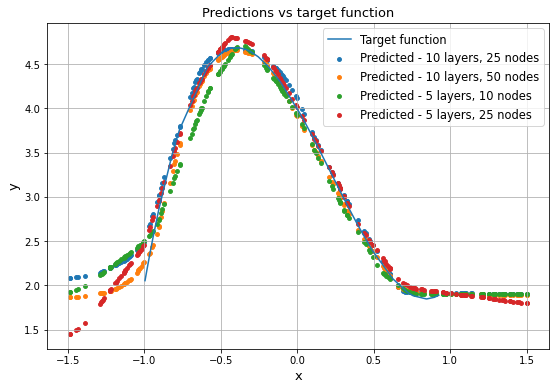

In [135]:
x_predicted = np.random.uniform(-1.5, 1.5, 200)
y_predicted2 = models[2].predict(x_predicted)
y_predicted3 = models[3].predict(x_predicted)
y_predicted5 = models[5].predict(x_predicted)
y_predicted6 = models[6].predict(x_predicted)

plt.figure(figsize=(9,6))
plt.scatter(x_predicted, y_predicted2, s=15, label = "Predicted - 10 layers, 25 nodes")
plt.scatter(x_predicted, y_predicted3, s=15, label = "Predicted - 10 layers, 50 nodes")
plt.scatter(x_predicted, y_predicted5, s=15, label = "Predicted - 5 layers, 10 nodes")
plt.scatter(x_predicted, y_predicted6, s=15, label = "Predicted - 5 layers, 25 nodes")
plt.plot(x_valid, y_target, label = "Target function")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function", size=13)
plt.legend(loc="upper right", fontsize=11.5)
plt.grid(True); plt.show()



The combinations that best fits the target function seem to be either 10 layers + 25 nodes or 10 layers + 50 nodes.

#### Activation functions

In this part various models with different activations functions (the final activation function is always *elu*) were tested. All models have 10 layers and 25 nodes. The activation function with the lowest mse on the validation and target set (*elu*, *selu*, *relu*, *tanh*) are plotted in the graphs below.

In [148]:
## open bounds activation functions: elu, selu, relu, softplus
models2 = []
acc_val2 = []
acc_tar2 = []
act = ["elu", "relu", "selu", "softplus"]
##elu
n = 25
for a in act:
    model = tf.keras.Sequential()
    model.add(Dense(n, input_shape=(1,),activation=a)) ## primo layer
    for i in range(9):  
        model.add(Dense(n, activation=a))
    model.add(Dense(1,activation='elu'))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=45,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
    models2.append(model) ## nel vettore di modelli dopo il training
    print("model with ", a)
     # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    print("mse on validation set = ", score[1])
    acc_val2.append(score[1])
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print("mse on target set = ", score[1])
    acc_tar2.append(score[1])

Epoch 1/45
16/16 [==============================] - 0s 15ms/step - loss: 2.9718 - mse: 2.9718 - val_loss: 0.6457 - val_mse: 0.6457
Epoch 2/45
16/16 [==============================] - 0s 3ms/step - loss: 0.4985 - mse: 0.4985 - val_loss: 0.6474 - val_mse: 0.6474
Epoch 3/45
16/16 [==============================] - 0s 3ms/step - loss: 0.4727 - mse: 0.4727 - val_loss: 0.5942 - val_mse: 0.5942
Epoch 4/45
16/16 [==============================] - 0s 4ms/step - loss: 0.4462 - mse: 0.4462 - val_loss: 0.5890 - val_mse: 0.5890
Epoch 5/45
16/16 [==============================] - 0s 4ms/step - loss: 0.4327 - mse: 0.4327 - val_loss: 0.5450 - val_mse: 0.5450
Epoch 6/45
16/16 [==============================] - 0s 3ms/step - loss: 0.4040 - mse: 0.4040 - val_loss: 0.4880 - val_mse: 0.4880
Epoch 7/45
16/16 [==============================] - 0s 4ms/step - loss: 0.3620 - mse: 0.3620 - val_loss: 0.4637 - val_mse: 0.4637
Epoch 8/45
16/16 [==============================] - 0s 3ms/step - loss: 0.3440 - mse: 0.3

Epoch 18/45
16/16 [==============================] - 0s 4ms/step - loss: 0.3074 - mse: 0.3074 - val_loss: 0.3828 - val_mse: 0.3828
Epoch 19/45
16/16 [==============================] - 0s 3ms/step - loss: 0.2939 - mse: 0.2939 - val_loss: 0.3690 - val_mse: 0.3690
Epoch 20/45
16/16 [==============================] - 0s 4ms/step - loss: 0.2843 - mse: 0.2843 - val_loss: 0.3384 - val_mse: 0.3384
Epoch 21/45
16/16 [==============================] - 0s 3ms/step - loss: 0.2493 - mse: 0.2493 - val_loss: 0.3110 - val_mse: 0.3110
Epoch 22/45
16/16 [==============================] - 0s 3ms/step - loss: 0.2601 - mse: 0.2601 - val_loss: 0.2486 - val_mse: 0.2486
Epoch 23/45
16/16 [==============================] - 0s 3ms/step - loss: 0.2141 - mse: 0.2141 - val_loss: 0.2150 - val_mse: 0.2150
Epoch 24/45
16/16 [==============================] - 0s 4ms/step - loss: 0.2131 - mse: 0.2131 - val_loss: 0.3553 - val_mse: 0.3553
Epoch 25/45
16/16 [==============================] - 0s 3ms/step - loss: 0.2457 - m

Epoch 35/45
16/16 [==============================] - 0s 4ms/step - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1144 - val_mse: 0.1144
Epoch 36/45
16/16 [==============================] - 0s 4ms/step - loss: 0.1100 - mse: 0.1100 - val_loss: 0.0930 - val_mse: 0.0930
Epoch 37/45
16/16 [==============================] - 0s 4ms/step - loss: 0.1457 - mse: 0.1457 - val_loss: 0.1558 - val_mse: 0.1558
Epoch 38/45
16/16 [==============================] - 0s 4ms/step - loss: 0.1181 - mse: 0.1181 - val_loss: 0.1058 - val_mse: 0.1058
Epoch 39/45
16/16 [==============================] - 0s 3ms/step - loss: 0.1122 - mse: 0.1122 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 40/45
16/16 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150 - val_loss: 0.1269 - val_mse: 0.1269
Epoch 41/45
16/16 [==============================] - 0s 3ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 0.0931 - val_mse: 0.0931
Epoch 42/45
16/16 [==============================] - 0s 4ms/step - loss: 0.1426 - m

In [152]:
## activation functions wth plateau: sigmoid, softsign, tanh, softmax
models3 = []
acc_val3 = []
acc_tar3 = []
act = ["sigmoid", "softsign", "tanh", "softmax"]
##elu
n = 25
for a in act:
    model = tf.keras.Sequential()
    model.add(Dense(n, input_shape=(1,),activation=a)) ## primo layer
    for i in range(9):  
        model.add(Dense(n, activation=a))
    model.add(Dense(1,activation='elu'))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=45,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid), verbose=0)
    models3.append(model) ## nel vettore di modelli dopo il training
    print("model with ", a)
     # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    print("mse on validation set = ", score[1])
    acc_val3.append(score[1])
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print("mse on target set = ", score[1])
    acc_tar3.append(score[1])

model with  sigmoid
mse on validation set =  1.010067343711853
mse on target set =  0.9929466843605042
model with  softsign
mse on validation set =  0.18996524810791016
mse on target set =  0.09004490077495575
model with  tanh
mse on validation set =  0.10092587769031525
mse on target set =  0.04024849086999893
model with  softmax
mse on validation set =  1.009340763092041
mse on target set =  0.9929134845733643


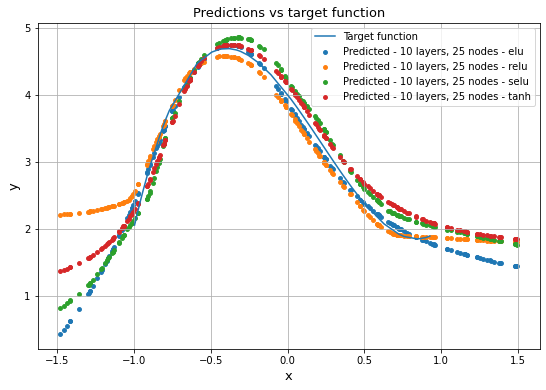

In [159]:
# plot
x_predicted = np.random.uniform(-1.5, 1.5, 200)
act = ["elu", "relu", "selu", "tanh"]
plt.figure(figsize=(9,6))

for i in range(3):
    y_predicted = models2[i].predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, s=15, label = "Predicted - 10 layers, 25 nodes - " + act[i])
y_predicted = models3[2].predict(x_predicted)
plt.scatter(x_predicted, y_predicted, s=15, label = "Predicted - 10 layers, 25 nodes - tanh")
plt.plot(x_valid, y_target, label = "Target function")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function", size=13)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True); plt.show()


#### Optimizers

In [160]:
n = 25

model1 = tf.keras.Sequential()
model1.add(Dense(n, input_shape=(1,),activation="elu")) ## primo layer
for i in range(9):  
        model1.add(Dense(n, activation="elu"))
model1.add(Dense(1,activation='elu'))
model1.compile(optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0), loss='mse', metrics=['mse'])
model1.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=45,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
     # evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print("mse on validation set = ", score[1])
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("mse on target set = ", score[1])

Epoch 1/45
16/16 [==============================] - 0s 15ms/step - loss: 2.6550 - mse: 2.6550 - val_loss: 0.6228 - val_mse: 0.6228
Epoch 2/45
16/16 [==============================] - 0s 3ms/step - loss: 0.4695 - mse: 0.4695 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 3/45
16/16 [==============================] - 0s 4ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.4996 - val_mse: 0.4996
Epoch 4/45
16/16 [==============================] - 0s 4ms/step - loss: 0.3782 - mse: 0.3782 - val_loss: 0.4056 - val_mse: 0.4056
Epoch 5/45
16/16 [==============================] - 0s 4ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.3468 - val_mse: 0.3468
Epoch 6/45
16/16 [==============================] - 0s 4ms/step - loss: 0.3064 - mse: 0.3064 - val_loss: 0.3156 - val_mse: 0.3156
Epoch 7/45
16/16 [==============================] - 0s 4ms/step - loss: 0.2598 - mse: 0.2598 - val_loss: 0.4233 - val_mse: 0.4233
Epoch 8/45
16/16 [==============================] - 0s 3ms/step - loss: 0.1884 - mse: 0.1

In [161]:
n = 25

model2 = tf.keras.Sequential()
model2.add(Dense(n, input_shape=(1,),activation="elu")) ## primo layer
for i in range(9):  
        model2.add(Dense(n, activation="elu"))
model2.add(Dense(1,activation='elu'))
model2.compile(optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), loss='mse', metrics=['mse'])
model2.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=45,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
     # evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print("mse on validation set = ", score[1])
score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("mse on target set = ", score[1])

Epoch 1/45
16/16 [==============================] - 0s 17ms/step - loss: 4.6079 - mse: 4.6079 - val_loss: 0.9657 - val_mse: 0.9657
Epoch 2/45
16/16 [==============================] - 0s 4ms/step - loss: 0.5979 - mse: 0.5979 - val_loss: 0.7031 - val_mse: 0.7031
Epoch 3/45
16/16 [==============================] - 0s 4ms/step - loss: 0.4579 - mse: 0.4579 - val_loss: 0.5733 - val_mse: 0.5733
Epoch 4/45
16/16 [==============================] - 0s 4ms/step - loss: 0.4267 - mse: 0.4267 - val_loss: 0.6852 - val_mse: 0.6852
Epoch 5/45
16/16 [==============================] - 0s 5ms/step - loss: 0.4780 - mse: 0.4780 - val_loss: 0.5199 - val_mse: 0.5199
Epoch 6/45
16/16 [==============================] - 0s 3ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.3039 - val_mse: 0.3039
Epoch 7/45
16/16 [==============================] - 0s 5ms/step - loss: 0.2670 - mse: 0.2670 - val_loss: 0.5139 - val_mse: 0.5139
Epoch 8/45
16/16 [==============================] - 0s 6ms/step - loss: 0.2698 - mse: 0.2

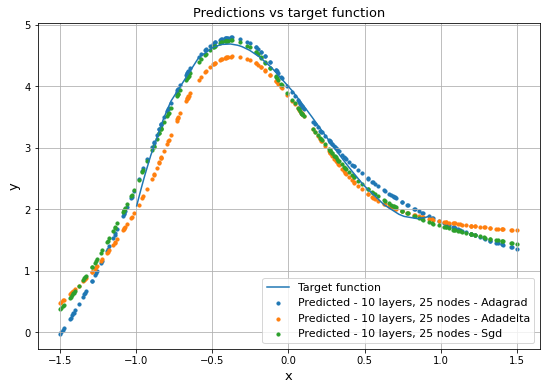

In [166]:
# plot
x_predicted = np.random.uniform(-1.5, 1.5, 200)
y_predicted1 = model1.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = models2[0].predict(x_predicted)


plt.figure(figsize=(9,6))

plt.scatter(x_predicted, y_predicted1, s=10, label = "Predicted - 10 layers, 25 nodes - Adagrad")
plt.scatter(x_predicted, y_predicted2, s=10, label = "Predicted - 10 layers, 25 nodes - Adadelta")
plt.scatter(x_predicted, y_predicted3, s=10, label = "Predicted - 10 layers, 25 nodes - Sgd")
plt.plot(x_valid, y_target, label = "Target function")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function", size=13)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True); plt.show()


#### Loss functions

mse, mae, mean_squared_logarithmic_error , logcosh
tanh relu elu selu
elu selu

In [32]:
from itertools import product
n = 25
model_loss = []
accval_loss = []
acctar_loss = []

loss = ["mse", "mae", "msle", "logcosh"]
act = ["tanh", "relu", "elu", "selu"]
act_last = ["elu", "selu"]

for l, a, al in product(loss, act, act_last):
    modelnew = tf.keras.Sequential()
    modelnew.add(Dense(n, input_shape=(1,),activation=a)) ## primo layer
    for i in range(9):  
        modelnew.add(Dense(n, activation=a))
    modelnew.add(Dense(1,activation=al))
    modelnew.compile(optimizer="Sgd", loss=l, metrics=['mse'])
    modelnew.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=45,
                  shuffle=True, # a good idea is to shuffle input before at each epoch
                  validation_data=(x_valid, y_valid), verbose=0)
    model_loss.append(modelnew)
    print("Model with ", l, "as loss, " , a, " as activation function, ", al, " as activation function in the last layer")
 # evaluate model
    score = modelnew.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    accval_loss.append(score[1])
    print("mse on validation set = ", score[1])
    score = modelnew.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    print("mse on target set = ", score[1])
    acctar_loss.append(score[1])

Model with  mse as loss,  tanh  as activation function,  elu  as activation function in the last layer
mse on validation set =  0.11694049835205078
mse on target set =  0.016518428921699524
Model with  mse as loss,  tanh  as activation function,  selu  as activation function in the last layer
mse on validation set =  0.09025753289461136
mse on target set =  0.007448142860084772
Model with  mse as loss,  relu  as activation function,  elu  as activation function in the last layer
mse on validation set =  0.14942198991775513
mse on target set =  0.03708008676767349
Model with  mse as loss,  relu  as activation function,  selu  as activation function in the last layer
mse on validation set =  0.1781599074602127
mse on target set =  0.0511559434235096
Model with  mse as loss,  elu  as activation function,  elu  as activation function in the last layer
mse on validation set =  0.08839383721351624
mse on target set =  0.016423877328634262
Model with  mse as loss,  elu  as activation function

In [36]:
acctar_loss_elu = []
acctar_loss_selu = []
for i in range(len(acctar_loss)):
    if (i%2 == 0):
        acctar_loss_elu.append(acctar_loss[i])
    else:
        acctar_loss_selu.append(acctar_loss[i])

acctar_loss_elu = np.round(acctar_loss_elu, decimals=3)
acctar_loss_selu = np.round(acctar_loss_selu, decimals=3)


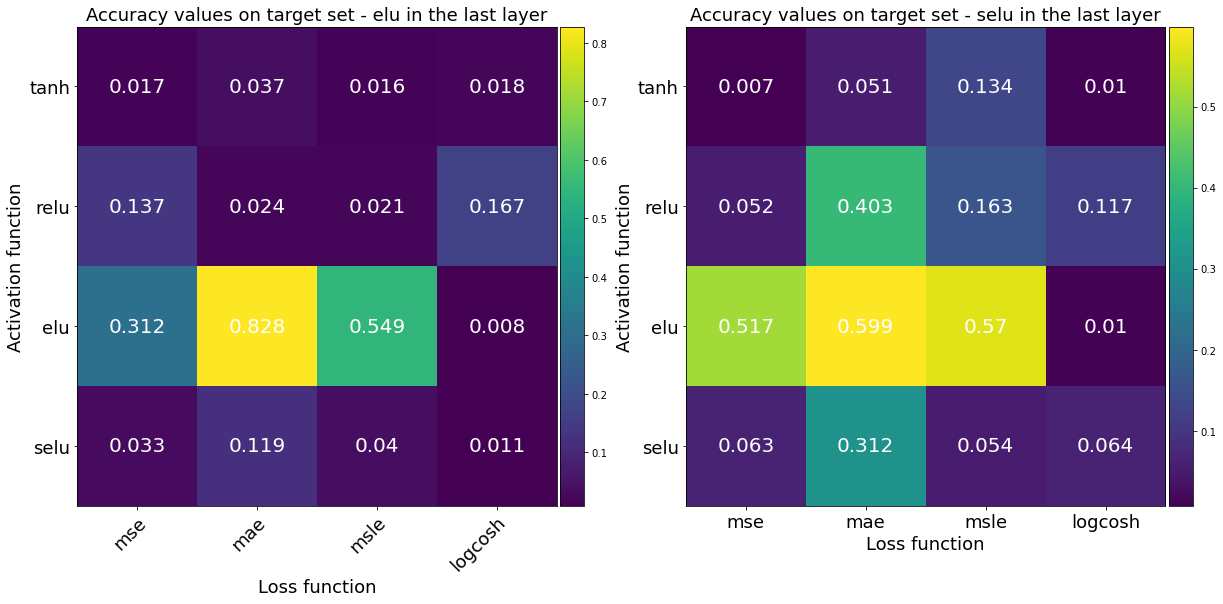

In [43]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
## righe = loss, cols = attivazione
acctar_loss_elu = np.reshape(acctar_loss_elu,(4,4))
acctar_loss_selu = np.reshape(acctar_loss_selu,(4,4))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

im1 = ax1.imshow(acctar_loss_elu)
ax1.set_xticks(np.arange(len(loss)))
ax1.set_yticks(np.arange(len(act)))
ax1.set_xticklabels(loss,size=18)
ax1.set_yticklabels(act,size=18)
ax1.set_xlabel("Loss function",size=18)
ax1.set_ylabel("Activation function",size=18)
ax1.set_title("Accuracy values on target set - elu in the last layer", size=18)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(loss)):
    for j in range(len(act)):
        text = ax1.text(j, i, acctar_loss_elu[i, j],
                       ha="center", va="center", color="w", size=20)

im2 = ax2.imshow(acctar_loss_selu)
ax2.set_xticks(np.arange(len(loss)))
ax2.set_yticks(np.arange(len(act)))
ax2.set_xticklabels(loss,size=18)
ax2.set_yticklabels(act,size=18)
ax2.set_xlabel("Loss function",size=18)
ax2.set_ylabel("Activation function",size=18)
ax2.set_title("Accuracy values on target set - selu in the last layer", size=18)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(loss)):
    for j in range(len(act)):
        text = ax2.text(j, i, acctar_loss_selu[i, j],
                       ha="center", va="center", color="w", size=20)
        
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')

Models with the lowest metrics were plotted:
- mse, tanh, selu in the last layer
- logcosh, tanh, selu in the last layer
- logcosh, elu, selu in the last layer
- logcosh, elu, elu in the last layer 

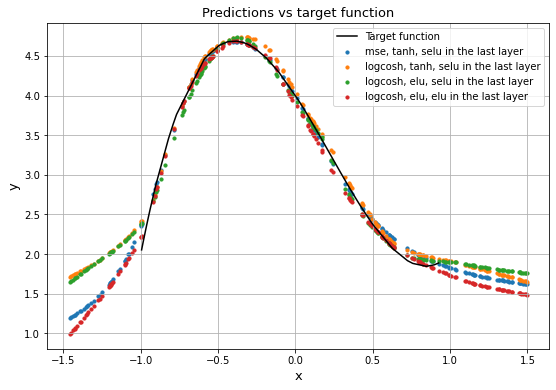

In [53]:
model_elu = []
model_selu = []
for i in range(len(model_loss)):
    if (i%2 == 0):
        model_elu.append(model_loss[i])
    else:
        model_selu.append(model_loss[i])

# plot
x_predicted = np.random.uniform(-1.5, 1.5, 200)
y_predicted1 = model_selu[0].predict(x_predicted) #mse, tanh, selu in the last layer
y_predicted2 = model_selu[3].predict(x_predicted) #logcosh, tanh, selu in the last layer
y_predicted3 = model_selu[11].predict(x_predicted) #logcosh, elu, selu in the last layer
y_predicted4 = model_elu[11].predict(x_predicted) #logcosh, elu, elu in the last layer

plt.figure(figsize=(9,6))

plt.scatter(x_predicted, y_predicted1, s=10, label = "mse, tanh, selu in the last layer")
plt.scatter(x_predicted, y_predicted2, s=10, label = "logcosh, tanh, selu in the last layer")
plt.scatter(x_predicted, y_predicted3, s=10, label = "logcosh, elu, selu in the last layer")
plt.scatter(x_predicted, y_predicted4, s=10, label = "logcosh, elu, elu in the last layer")
plt.plot(x_valid, y_target, label = "Target function", color="k")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function", size=13)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True); plt.show()


### 11.3

In this part the NN was applied to a 2D function: $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

At first, I tried to apply the model with the best score in 11.2, just using *linear* as activation function in the last layer instead of *selu*: 
- 10 layers of 25 nodes each, 
- *mse* as loss function,
- *tanh* as activation function in all the layers except for the last + *linear* in the last layer.

Moreover, I increased the size of training and validation sets (keeping $N_{valid} = 0.1 \times N_{train}$) and slightly reduced the noise standard deviation. 

In [1]:
### importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
#from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def func2d (x,y):
    a = x**2 + y**2
    return np.sin(a)

In [3]:
## training and validation sets
np.random.seed(0)
ntrain = 20000
nvalid = 2000

x_train = np.random.uniform(-1.5, 1.5, ntrain)
x_valid = np.random.uniform(-1.5, 1.5, nvalid)
x_valid.sort()
y_train = np.random.uniform(-1.5, 1.5, ntrain)
y_valid = np.random.uniform(-1.5, 1.5, nvalid)
y_valid.sort()

z_target = func2d(x_valid, y_valid) # ideal (target) function

sigma = 0.25 # noise or standard deviation
z_train = np.random.normal(func2d(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func2d(x_valid, y_valid), sigma)

## algo input
data_train = np.zeros((ntrain,2))
data_valid = np.zeros((nvalid, 2))
for i in range(ntrain):
    data_train[i,0] = x_train[i]
    data_train[i,1] = y_train[i]
for j in range(nvalid):
    data_valid[j,0] = x_valid[j]
    data_valid[j,1] = y_valid[j]

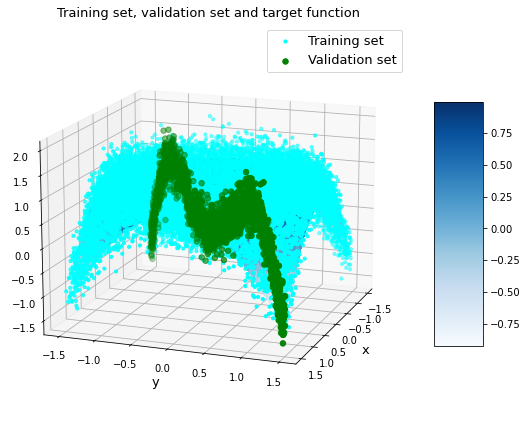

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

# Make data.
X = x_valid
Y = y_valid
X, Y = np.meshgrid(X, Y)
R = (X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="Blues",
                       linewidth=0, antialiased=False)
## Add points
ax.scatter(x_train, y_train, z_train, color = "aqua", s=10, label="Training set")
ax.scatter(x_valid, y_valid, z_valid, color='green', s=30, label="Validation set")

ax.set_xlabel("x",size=13)
ax.set_ylabel("y",size=13)
ax.set_title("Training set, validation set and target function", size=13)
ax.legend(loc="upper right", fontsize=13)
ax.view_init(15, 20)
# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [11]:
###MODEL 1: 10 layers of 25 nodes each, 
###*mse* as loss function, tanh + selu

model1 = Sequential()
model1.add(Dense(25, input_shape=(2,), activation='tanh')) 
for i in range(8):
    model1.add(Dense(25, activation='tanh'))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                6

In [12]:
history1 = model1.fit(x=data_train, y=z_train, 
          batch_size=128, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, z_valid))

Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 0.2237 - mse: 0.2237 - val_loss: 0.4526 - val_mse: 0.4526
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2142 - mse: 0.2142 - val_loss: 0.4455 - val_mse: 0.4455
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2133 - mse: 0.2133 - val_loss: 0.4450 - val_mse: 0.4450
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2129 - mse: 0.2129 - val_loss: 0.4388 - val_mse: 0.4388
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2126 - mse: 0.2126 - val_loss: 0.4455 - val_mse: 0.4455
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2122 - mse: 0.2122 - val_loss: 0.4757 - val_mse: 0.4757
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2121 - mse: 0.2121 - val_loss: 0.4429 - val_mse: 0.4429
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - 

157/157 [==============================] - 0s 2ms/step - loss: 0.0999 - mse: 0.0999 - val_loss: 0.1568 - val_mse: 0.1568
Epoch 63/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0982 - mse: 0.0982 - val_loss: 0.1113 - val_mse: 0.1113
Epoch 64/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0965 - mse: 0.0965 - val_loss: 0.1186 - val_mse: 0.1186
Epoch 65/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.1127 - val_mse: 0.1127
Epoch 66/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0936 - mse: 0.0936 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 67/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0984 - val_mse: 0.0984
Epoch 68/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.1019 - val_mse: 0.1019
Epoch 69/100
157/157 [==============================] - 0s 2ms/step - loss:

In [13]:
# evaluate model
score = model1.evaluate(data_valid, z_valid, batch_size=128, verbose=0)
print("mse on validation set = ", score[1])
score = model1.evaluate(data_valid, z_target, batch_size=128, verbose=0)
print("mse on target set = ", score[1])

mse on validation set =  0.06781716644763947
mse on target set =  0.005603877827525139


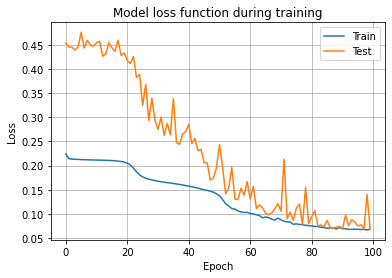

In [22]:
## plot loss function during training
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss function during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

In [15]:
x_predicted = np.random.uniform(-1.5, 1.5, nvalid)
y_predicted = np.random.uniform(-1.5, 1.5, nvalid)
data_predicted = np.zeros((nvalid,2))
for k in range(nvalid):
    data_predicted[k,0] = x_predicted[k]
    data_predicted[k,1] = y_predicted[k]

z_predicted = model1.predict(data_predicted)

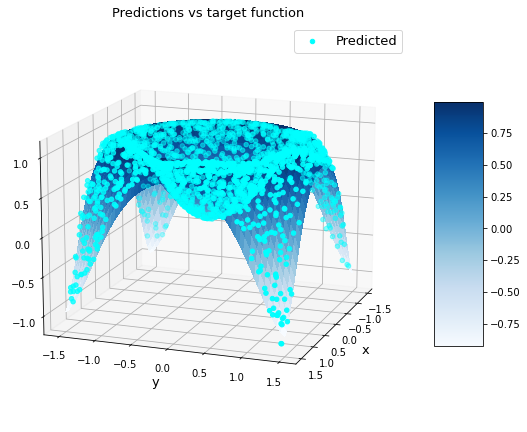

In [20]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

# Make data
X = x_valid
Y = y_valid
X, Y = np.meshgrid(X, Y)
R = (X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="Blues",
                       linewidth=0, antialiased=False)
## Add points
ax.scatter(x_predicted, y_predicted, z_predicted , color="aqua", label = "Predicted")

ax.set_xlabel("x",size=13)
ax.set_ylabel("y",size=13)
ax.set_title("Predictions vs target function", size=13)
ax.legend(loc="upper right", fontsize=13)
ax.view_init(15, 20)
# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The NN correclty predicts the data. However, the loss function shows a decreasing trend but keeps oscillating during training. Therefore I tried reducing the number of inner layers to make the model simpler.

In [25]:
## 4 layer, 25 nodes, mse, tanh+linear
model2 = Sequential()
model2.add(Dense(25, input_shape=(2,), activation='tanh'))
model2.add(Dense(25, activation='tanh'))
model2.add(Dense(25, activation='tanh'))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 15)                45        
_________________________________________________________________
dense_15 (Dense)             (None, 25)                400       
_________________________________________________________________
dense_16 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [26]:
history2 = model2.fit(x=data_train, y=z_train, 
          batch_size=128, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, z_valid))

Epoch 1/150
157/157 [==============================] - 0s 2ms/step - loss: 0.2361 - mse: 0.2361 - val_loss: 0.4521 - val_mse: 0.4521
Epoch 2/150
157/157 [==============================] - 0s 1ms/step - loss: 0.2151 - mse: 0.2151 - val_loss: 0.4423 - val_mse: 0.4423
Epoch 3/150
157/157 [==============================] - 0s 1ms/step - loss: 0.2141 - mse: 0.2141 - val_loss: 0.4487 - val_mse: 0.4487
Epoch 4/150
157/157 [==============================] - 0s 1ms/step - loss: 0.2132 - mse: 0.2132 - val_loss: 0.4541 - val_mse: 0.4541
Epoch 5/150
157/157 [==============================] - 0s 1ms/step - loss: 0.2124 - mse: 0.2124 - val_loss: 0.4496 - val_mse: 0.4496
Epoch 6/150
157/157 [==============================] - 0s 1ms/step - loss: 0.2118 - mse: 0.2118 - val_loss: 0.4579 - val_mse: 0.4579
Epoch 7/150
157/157 [==============================] - 0s 1ms/step - loss: 0.2113 - mse: 0.2113 - val_loss: 0.4564 - val_mse: 0.4564
Epoch 8/150
157/157 [==============================] - 0s 2ms/step - 

157/157 [==============================] - 0s 2ms/step - loss: 0.1120 - mse: 0.1120 - val_loss: 0.1753 - val_mse: 0.1753
Epoch 63/150
157/157 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108 - val_loss: 0.1708 - val_mse: 0.1708
Epoch 64/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096 - val_loss: 0.1689 - val_mse: 0.1689
Epoch 65/150
157/157 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 0.1088 - val_loss: 0.1657 - val_mse: 0.1657
Epoch 66/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1077 - mse: 0.1077 - val_loss: 0.1633 - val_mse: 0.1633
Epoch 67/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067 - val_loss: 0.1604 - val_mse: 0.1604
Epoch 68/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.1545 - val_mse: 0.1545
Epoch 69/150
157/157 [==============================] - 0s 2ms/step - loss:

157/157 [==============================] - 0s 2ms/step - loss: 0.0738 - mse: 0.0738 - val_loss: 0.0917 - val_mse: 0.0917
Epoch 124/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0734 - mse: 0.0734 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 125/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 126/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0789 - val_mse: 0.0789
Epoch 127/150
157/157 [==============================] - 0s 1ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 128/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0723 - mse: 0.0723 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 129/150
157/157 [==============================] - 0s 2ms/step - loss: 0.0721 - mse: 0.0721 - val_loss: 0.0763 - val_mse: 0.0763
Epoch 130/150
157/157 [==============================] - 0s 1ms/step 

In [27]:
# evaluate model
score = model2.evaluate(data_valid, z_valid, batch_size=32, verbose=0)
print("mse on validation set = ", score[1])
score = model2.evaluate(data_valid, z_target, batch_size=32, verbose=0)
print("mse on target set = ", score[1])

mse on validation set =  0.07492297887802124
mse on target set =  0.011363664641976357


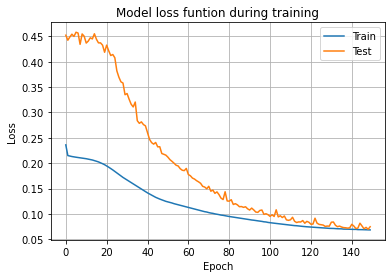

In [28]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss funtion during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

In [30]:
x_predicted = np.random.uniform(-1.5, 1.5, nvalid)
y_predicted = np.random.uniform(-1.5, 1.5, nvalid)
data_predicted = np.zeros((nvalid,2))
for k in range(nvalid):
    data_predicted[k,0] = x_predicted[k]
    data_predicted[k,1] = y_predicted[k]

z_predicted = model2.predict(data_predicted)

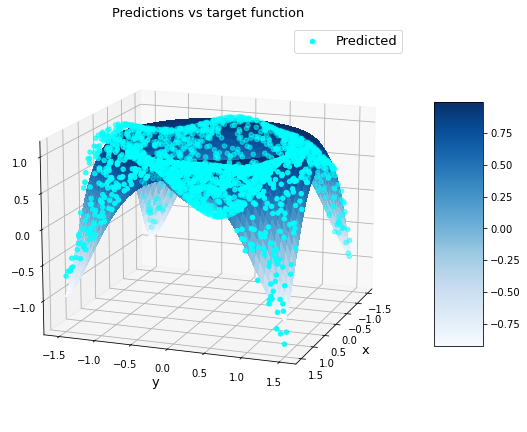

In [32]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

# Make data
X = x_valid
Y = y_valid
X, Y = np.meshgrid(X, Y)
R = (X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="Blues",
                       linewidth=0, antialiased=False)
## Add points
ax.scatter(x_predicted, y_predicted, z_predicted , color="aqua", label = "Predicted")

ax.set_xlabel("x",size=13)
ax.set_ylabel("y",size=13)
ax.set_title("Predictions vs target function", size=13)
ax.legend(loc="upper right", fontsize=13)
ax.view_init(15, 20)
# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [87]:
N_train = 20000
N_valid = 2000

x_train = np.random.uniform(-3/2, 3/2, N_train)
y_train = np.random.uniform(-3/2, 3/2, N_train)

x_valid = np.random.uniform(-3/2, 3/2, N_valid)
y_valid = np.random.uniform(-3/2, 3/2, N_valid)
x_valid.sort()
y_valid.sort()

z_target = np.sin(x_valid**2 + y_valid**2)    #ideal (target) function

sigma = 0.25 # noise or standard deviation
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

In [88]:
#create new model
model_sin = Sequential()
model_sin.add(Dense(10, input_shape=(2,), activation='tanh'))
model_sin.add(Dense(20, activation='tanh'))
model_sin.add(Dense(20, activation='tanh'))
model_sin.add(Dense(1, activation='linear'))

#compile the model
model_sin.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#return a summary for NN
model_sin.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_77 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_78 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 21        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [89]:
#prepare input
xx = np.array([x_train, y_train])
x1 = xx.transpose()

xx_valid = np.array([x_valid,y_valid])
xx_valid = xx_valid.transpose()

In [90]:
#fit the model
fit_sin = model_sin.fit(x=x1, y=z_train, batch_size=100, epochs=110,
                          shuffle=True, validation_data=(xx_valid, z_valid))

Epoch 1/110
200/200 [==============================] - 0s 2ms/step - loss: 0.2276 - mse: 0.2276 - val_loss: 0.4426 - val_mse: 0.4426
Epoch 2/110
200/200 [==============================] - 0s 1ms/step - loss: 0.2147 - mse: 0.2147 - val_loss: 0.4367 - val_mse: 0.4367
Epoch 3/110
200/200 [==============================] - 0s 1ms/step - loss: 0.2144 - mse: 0.2144 - val_loss: 0.4314 - val_mse: 0.4314
Epoch 4/110
200/200 [==============================] - 0s 1ms/step - loss: 0.2139 - mse: 0.2139 - val_loss: 0.4280 - val_mse: 0.4280
Epoch 5/110
200/200 [==============================] - 0s 1ms/step - loss: 0.2133 - mse: 0.2133 - val_loss: 0.4262 - val_mse: 0.4262
Epoch 6/110
200/200 [==============================] - 0s 1ms/step - loss: 0.2129 - mse: 0.2129 - val_loss: 0.4223 - val_mse: 0.4223
Epoch 7/110
200/200 [==============================] - 0s 1ms/step - loss: 0.2127 - mse: 0.2127 - val_loss: 0.4337 - val_mse: 0.4337
Epoch 8/110
200/200 [==============================] - 0s 1ms/step - 

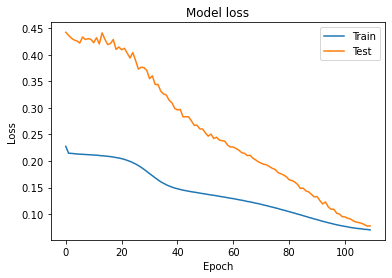

In [92]:
plt.plot(fit_sin.history['loss'])
plt.plot(fit_sin.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [110]:
#abbassiamo leggermente sigma
sigma=0.1
##creiamo la funzione
def f(x, y):
    return np.sin(x**2+y**2)

# dataset
dat_train=np.zeros((30000,2))
dat_train[:,0]=np.random.uniform(-1.5, 1.5, 30000) 
dat_train[:,1]=np.random.uniform(-1.5, 1.5, 30000)

dat_valid=np.zeros((2000,2))
dat_valid[:,0]=np.random.uniform(-1.5, 1.5, 2000) 
dat_valid[:,1]=np.random.uniform(-1.5, 1.5, 2000)

fz_target=f(dat_valid[:,0],dat_valid[:,1]) 

# dataset + sigma
fz_train= np.random.normal(f(dat_train[:,0], dat_train[:,1]), sigma) 
fz_valid= np.random.normal(f(dat_valid[:,0], dat_valid[:,1]), sigma)

In [113]:
opt1='Adam'
opt2='sgd'

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,), activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer=opt1, loss="mse", metrics=['mse'])
history= model.fit(dat_train, fz_train, batch_size=32, epochs=100, validation_data=(dat_valid, fz_valid)) #callbacks=[ plot_estimate, earlystop],



Epoch 1/100
938/938 [==============================] - 1s 2ms/step - loss: 0.1665 - mse: 0.1665 - val_loss: 0.1510 - val_mse: 0.1510
Epoch 2/100
938/938 [==============================] - 1s 1ms/step - loss: 0.1421 - mse: 0.1421 - val_loss: 0.0998 - val_mse: 0.0998
Epoch 3/100
938/938 [==============================] - 1s 1ms/step - loss: 0.0704 - mse: 0.0704 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 4/100
833/938 [=========================>....] - ETA: 0s - loss: 0.0383 - mse: 0.0383

KeyboardInterrupt: 

In [114]:
dat_valid

array([[-0.57922199,  0.38605482],
       [ 0.89964282, -0.00314031],
       [-0.1511412 , -0.44314009],
       ...,
       [ 1.09762546, -0.61325556],
       [-0.58153384, -0.59108901],
       [-1.10261258, -0.02527123]])

In [115]:
 fz_valid

array([0.46519632, 0.59686141, 0.16313885, ..., 0.953667  , 0.62332577,
       0.67570232])

In [21]:
history1